## Import modules and data uploading

In [1]:
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
import json
from PIL import Image
import os

import scipy

In [3]:
def plot_loss(history):
    plt.figure(figsize=(12, 5))
    epochs = np.arange(1, len(history.history['loss']) + 1)
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss')

    plt.tight_layout()
    plt.show()

In [4]:
def plot_accuracy(history):
    plt.figure(figsize=(12, 5))
    epochs = np.arange(1, len(history.history['accuracy']) + 1)
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Training Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy')

    plt.tight_layout()
    plt.show()

In [5]:
data_dir = "dataset_malaysian_coins"

data_train_path =  data_dir + '/train'
data_test_path =  data_dir + '/test'

In [19]:
batch_size = 32

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

train_generator = datagen_train.flow_from_directory(
        data_train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

datagen_test = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    rescale=1./255)

test_generator = datagen_test.flow_from_directory(
        data_test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 1598 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


## MobileNetV2

In [20]:
from keras.applications import MobileNetV2, ResNet50, InceptionV3, EfficientNetB0
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.models import Model


input_tensor = Input(shape=(224, 224, 3))
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    input_shape=(224, 224, 3),
    pooling='avg')
    
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [21]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

num_train = len(train_generator.filenames)
num_test = len(test_generator.filenames)

history = model.fit(
    train_generator,
    steps_per_epoch=num_train//batch_size,
    epochs=25,
    verbose=1,
    validation_data=test_generator,
    validation_steps=num_test//batch_size)

Epoch 1/25
49/49 [==============================] - 52s 986ms/step - loss: 1.4104 - accuracy: 0.4898 - val_loss: 1.1570 - val_accuracy: 0.5026
Epoch 2/25
49/49 [==============================] - 54s 1s/step - loss: 0.8079 - accuracy: 0.6897 - val_loss: 0.9400 - val_accuracy: 0.6328
Epoch 3/25
49/49 [==============================] - 50s 1s/step - loss: 0.5677 - accuracy: 0.7771 - val_loss: 0.8553 - val_accuracy: 0.6510
Epoch 4/25
49/49 [==============================] - 60s 1s/step - loss: 0.4511 - accuracy: 0.8295 - val_loss: 0.8853 - val_accuracy: 0.6484
Epoch 5/25
49/49 [==============================] - 59s 1s/step - loss: 0.3373 - accuracy: 0.8787 - val_loss: 0.8283 - val_accuracy: 0.6745
Epoch 6/25
49/49 [==============================] - 48s 987ms/step - loss: 0.2947 - accuracy: 0.8921 - val_loss: 0.7449 - val_accuracy: 0.7266
Epoch 7/25
49/49 [==============================] - 63s 1s/step - loss: 0.2536 - accuracy: 0.8959 - val_loss: 0.8051 - val_accuracy: 0.7109
Epoch 8/25
49/

In [23]:
model.save('ml_model_mobilenet_1')

INFO:tensorflow:Assets written to: ml_model_mobilenet_1_improved\assets


INFO:tensorflow:Assets written to: ml_model_mobilenet_1_improved\assets


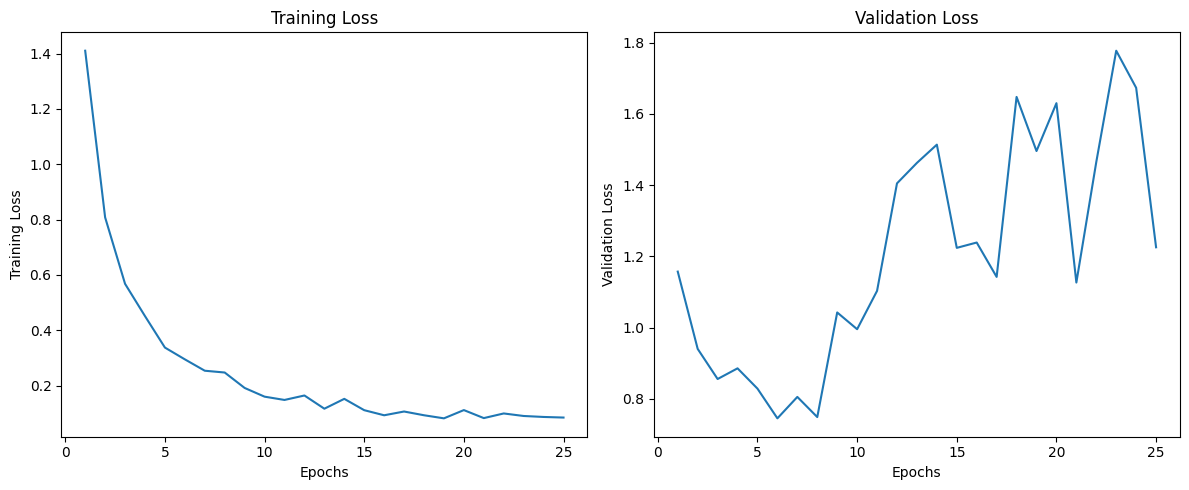

In [24]:
plot_loss(history)

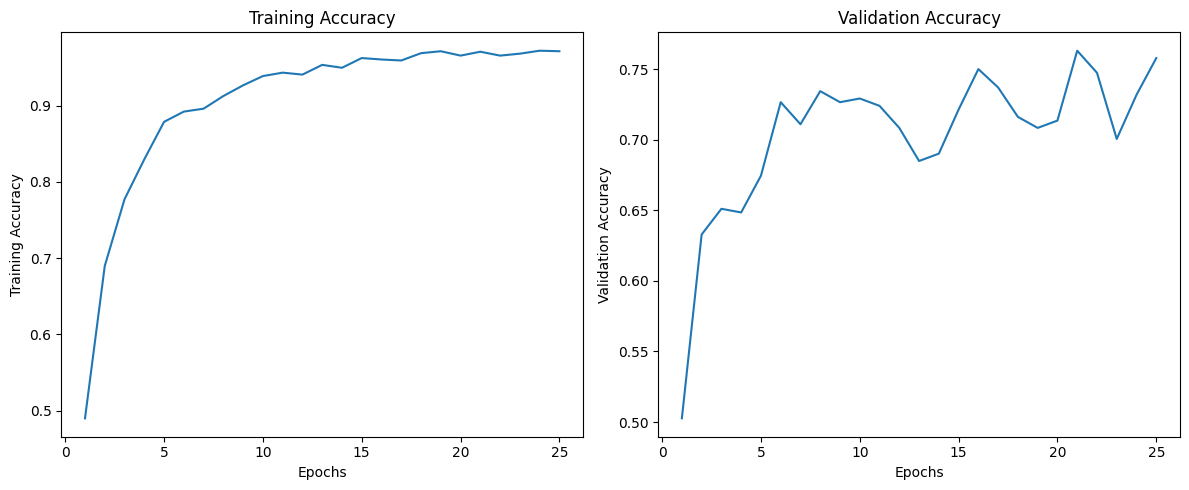

In [25]:
plot_accuracy(history)

## GoogLeNet

In [27]:
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    input_shape=(224, 224, 3),
    pooling='avg')
    
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [28]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
num_train = len(train_generator.filenames)
num_test = len(test_generator.filenames)

history = model.fit(
    train_generator,
    steps_per_epoch=num_train//batch_size,
    epochs=25,
    verbose=1,
    validation_data=test_generator,
    validation_steps=num_test//batch_size)

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1864: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "
C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1874: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "


Epoch 1/25
49/49 [==============================] - 73s 1s/step - loss: 1.4267 - accuracy: 0.4706 - val_loss: 1.1760 - val_accuracy: 0.4818
Epoch 2/25
49/49 [==============================] - 70s 1s/step - loss: 0.8911 - accuracy: 0.6616 - val_loss: 0.9816 - val_accuracy: 0.5625
Epoch 3/25
49/49 [==============================] - 73s 1s/step - loss: 0.6882 - accuracy: 0.7420 - val_loss: 0.7650 - val_accuracy: 0.7057
Epoch 4/25
49/49 [==============================] - 74s 2s/step - loss: 0.5907 - accuracy: 0.7848 - val_loss: 0.7214 - val_accuracy: 0.7526
Epoch 5/25
49/49 [==============================] - 75s 2s/step - loss: 0.4533 - accuracy: 0.8327 - val_loss: 0.6486 - val_accuracy: 0.7656
Epoch 6/25
49/49 [==============================] - 74s 2s/step - loss: 0.4634 - accuracy: 0.8161 - val_loss: 0.6252 - val_accuracy: 0.7656
Epoch 7/25
49/49 [==============================] - 74s 2s/step - loss: 0.3127 - accuracy: 0.8774 - val_loss: 0.7225 - val_accuracy: 0.7891
Epoch 8/25
49/49 [==

In [30]:
model.save('ml_model_googlenet_1')

INFO:tensorflow:Assets written to: ml_model_googlenet_1_improved\assets


INFO:tensorflow:Assets written to: ml_model_googlenet_1_improved\assets


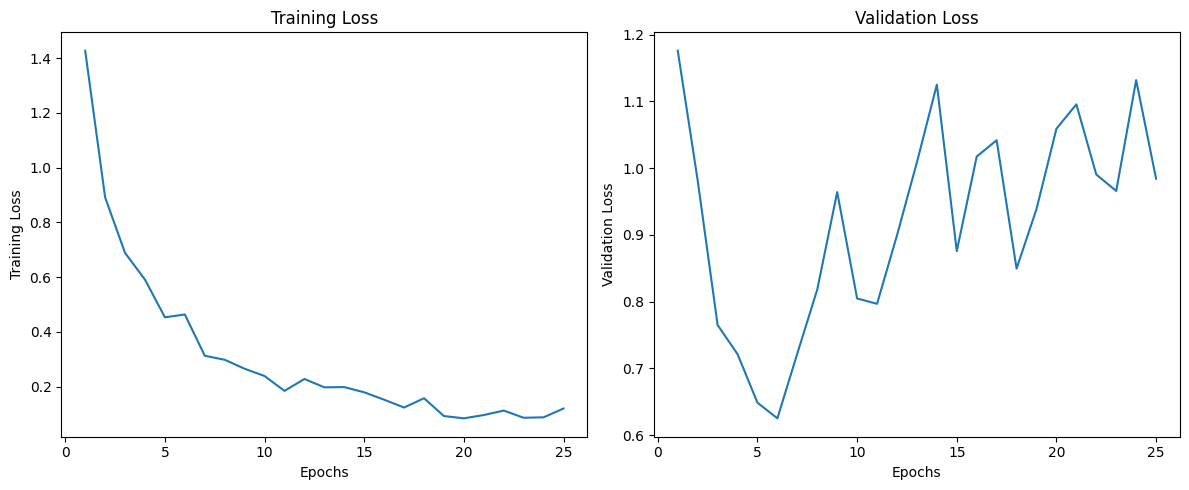

In [31]:
plot_loss(history)

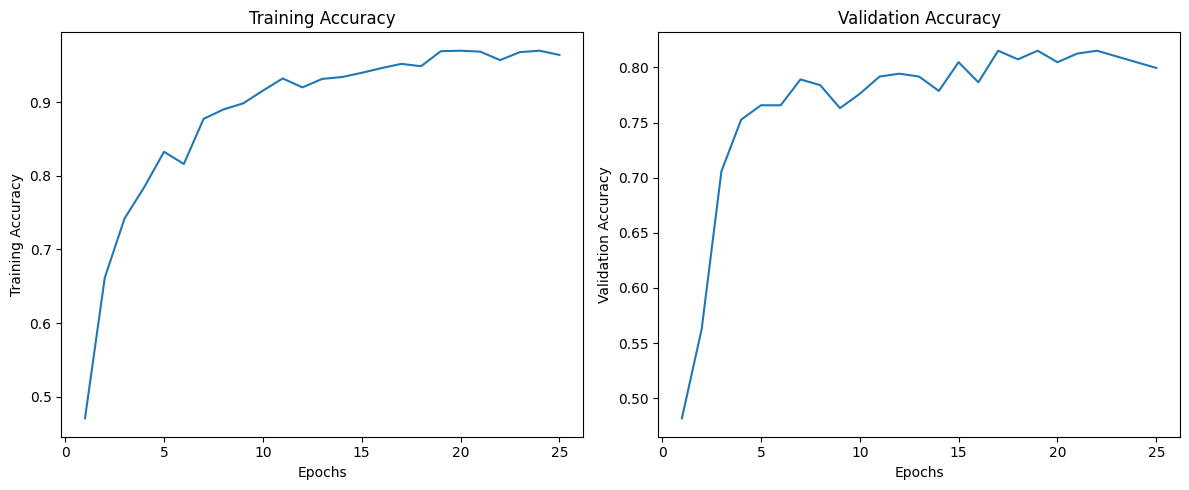

In [32]:
plot_accuracy(history)

## ResNet50

In [33]:
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    input_shape=(224, 224, 3),
    pooling='avg')

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [34]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
num_train = len(train_generator.filenames)
num_test = len(test_generator.filenames)

history = model.fit(
    train_generator,
    steps_per_epoch=num_train//batch_size,
    epochs=25,
    verbose=1,
    validation_data=test_generator,
    validation_steps=num_test//batch_size)

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1864: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "
C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1874: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "


Epoch 1/25
49/49 [==============================] - 75s 1s/step - loss: 1.3556 - accuracy: 0.5077 - val_loss: 1.2540 - val_accuracy: 0.4193
Epoch 2/25
49/49 [==============================] - 79s 2s/step - loss: 0.8612 - accuracy: 0.6845 - val_loss: 0.9161 - val_accuracy: 0.6354
Epoch 3/25
49/49 [==============================] - 81s 2s/step - loss: 0.6877 - accuracy: 0.7420 - val_loss: 0.6657 - val_accuracy: 0.6823
Epoch 4/25
49/49 [==============================] - 82s 2s/step - loss: 0.5823 - accuracy: 0.7797 - val_loss: 0.8561 - val_accuracy: 0.7240
Epoch 5/25
49/49 [==============================] - 83s 2s/step - loss: 0.4777 - accuracy: 0.8199 - val_loss: 0.7605 - val_accuracy: 0.7578
Epoch 6/25
49/49 [==============================] - 91s 2s/step - loss: 0.4404 - accuracy: 0.8429 - val_loss: 0.8182 - val_accuracy: 0.7318
Epoch 7/25
49/49 [==============================] - 83s 2s/step - loss: 0.3299 - accuracy: 0.8659 - val_loss: 0.8587 - val_accuracy: 0.7344
Epoch 8/25
49/49 [==

In [36]:
model.save('ml_model_resnet50_1')

INFO:tensorflow:Assets written to: ml_model_resnet50_1_improved\assets


INFO:tensorflow:Assets written to: ml_model_resnet50_1_improved\assets


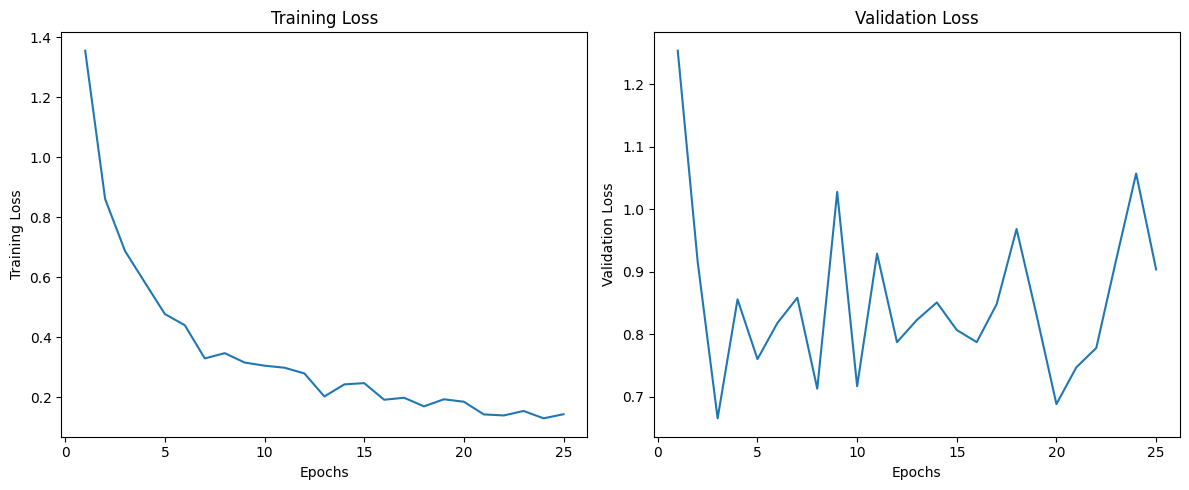

In [37]:
plot_loss(history)

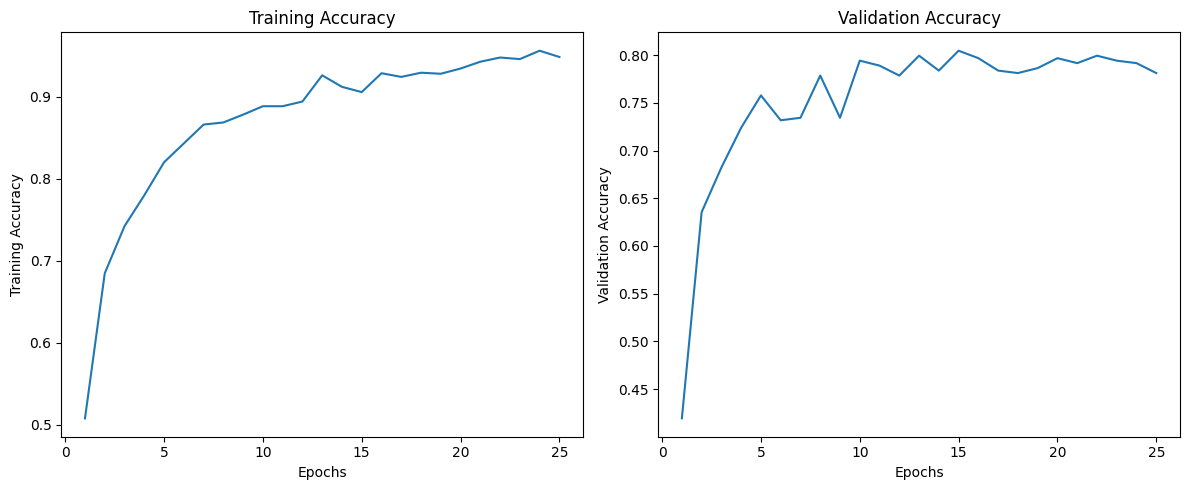

In [38]:
plot_accuracy(history)